In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from dateutil import parser
import seaborn as sns

In [2]:
adten=pd.read_csv('appdata10.csv')
adten.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [3]:
adten.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
adten.hour.str.slice(1,3).astype(int)

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [5]:
adten['hour']=adten.hour.str.slice(1,3).astype(int)
adten.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [6]:
adten_copy=adten.drop(columns=['user','first_open','screen_list','enrolled_date','enrolled'])
adten_copy.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


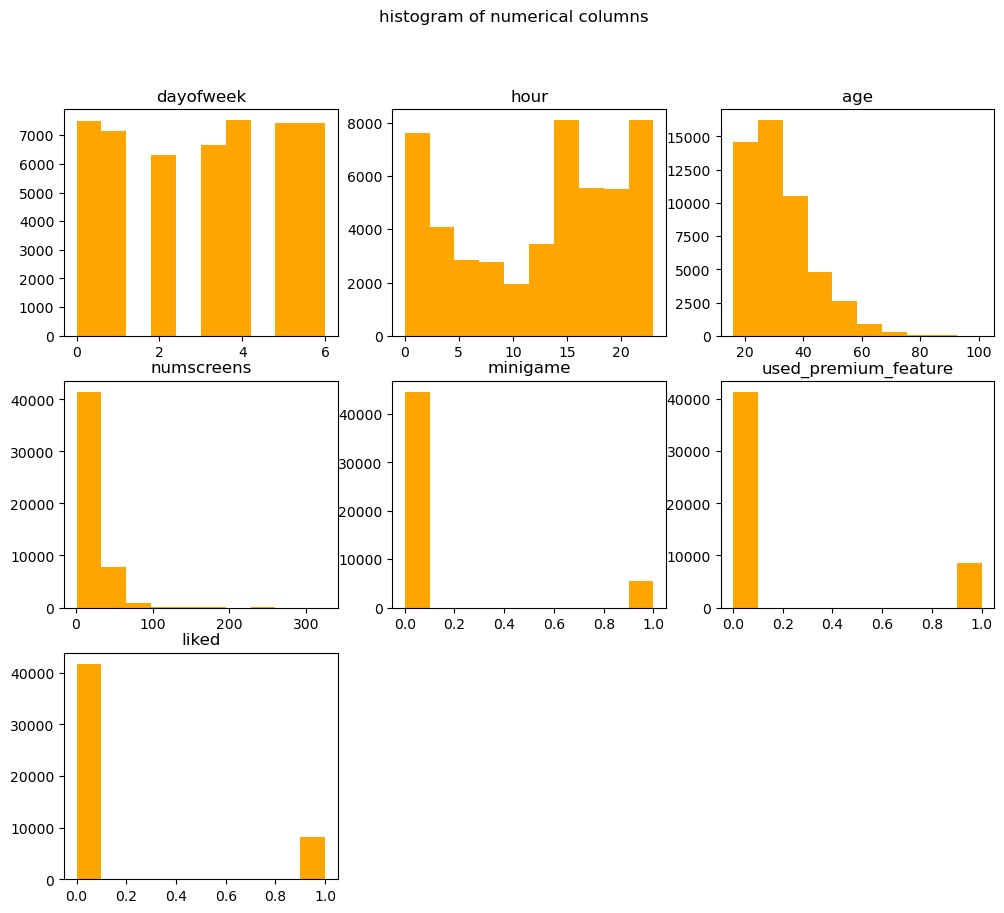

In [7]:
#making histogram
plt.figure(figsize=(12,10))
plt.suptitle("histogram of numerical columns")

for i in range(1,adten_copy.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(adten_copy.columns.values[i-1])
    vals=np.size(adten_copy.iloc[:,i-1].unique())
    plt.hist(adten_copy.iloc[:,i-1],color="orange")

plt.show()

In [8]:
#correlation plot

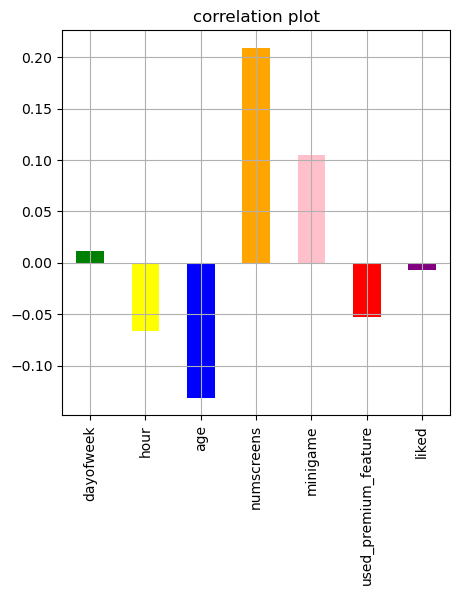

In [9]:
adten_copy.corrwith(adten.enrolled).plot.bar(figsize=(5,5),grid=True,title="correlation plot",
                                             color=["green","yellow","blue","orange","pink","red","purple"])
plt.show()

In [10]:
#correlation matrix

In [11]:
adten_copy.corr()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
dayofweek,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,-0.005737
hour,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.001725
age,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.002593
numscreens,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,-0.007349
minigame,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,-0.012250
used_premium_feature,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,0.001690
liked,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,1.000000


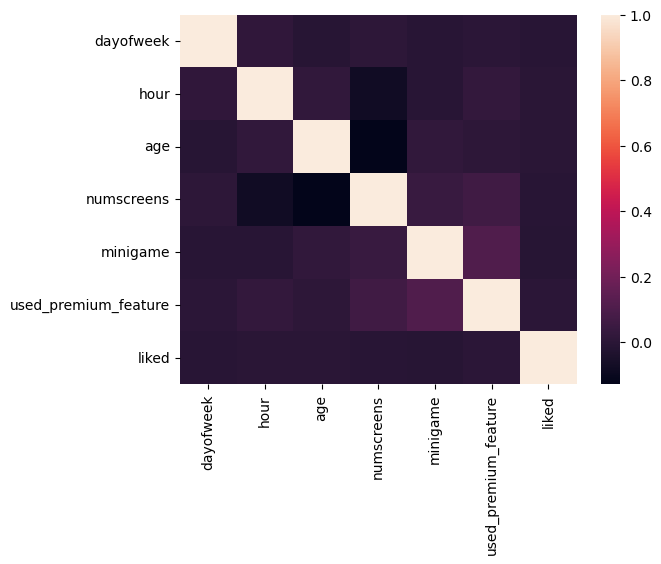

In [12]:
sns.heatmap(adten_copy.corr())
plt.show()

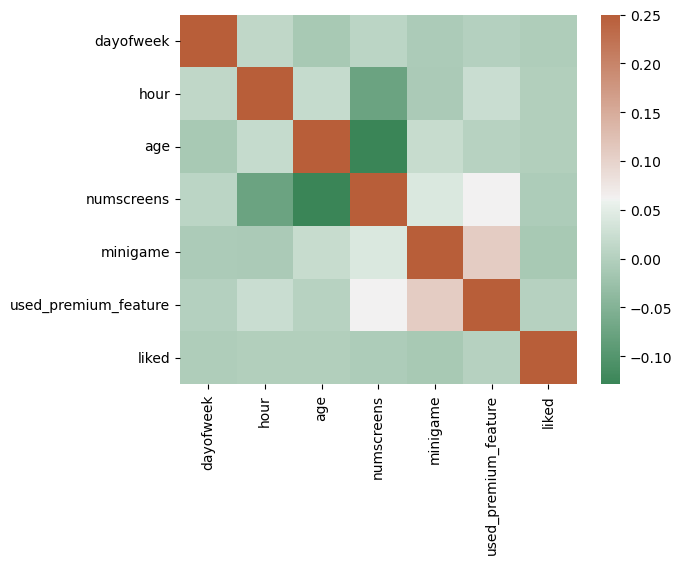

In [13]:
cmap=sns.diverging_palette(500,25,as_cmap=True)
sns.heatmap(adten_copy.corr(),cmap=cmap,vmax=0.25)
plt.show()

In [14]:
adten.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [15]:
[parser.parse(rowdata) for rowdata in adten['first_open']]

[datetime.datetime(2012, 12, 27, 2, 14, 51, 273000),
 datetime.datetime(2012, 12, 2, 1, 16, 0, 905000),
 datetime.datetime(2013, 3, 19, 19, 19, 9, 157000),
 datetime.datetime(2013, 7, 5, 16, 8, 46, 354000),
 datetime.datetime(2013, 2, 26, 18, 50, 48, 661000),
 datetime.datetime(2013, 4, 3, 9, 58, 15, 752000),
 datetime.datetime(2012, 12, 25, 2, 33, 18, 461000),
 datetime.datetime(2012, 12, 11, 3, 7, 49, 875000),
 datetime.datetime(2013, 3, 20, 14, 22, 1, 569000),
 datetime.datetime(2013, 4, 26, 18, 22, 16, 13000),
 datetime.datetime(2013, 5, 14, 4, 48, 27, 597000),
 datetime.datetime(2013, 5, 28, 11, 7, 7, 358000),
 datetime.datetime(2012, 12, 17, 6, 28, 45, 903000),
 datetime.datetime(2013, 5, 25, 19, 52, 31, 798000),
 datetime.datetime(2013, 2, 18, 4, 48, 48, 912000),
 datetime.datetime(2013, 2, 2, 18, 41, 35, 724000),
 datetime.datetime(2013, 7, 7, 16, 7, 35, 57000),
 datetime.datetime(2013, 2, 2, 21, 12, 46, 888000),
 datetime.datetime(2013, 5, 10, 5, 59, 43, 405000),
 datetime.dat

In [16]:
adten['first_open']=[parser.parse(rowdata) for rowdata in adten['first_open']]

In [17]:
adten.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date                   object
liked                            int64
dtype: object

In [18]:
[parser.parse(rowdata) if isinstance(rowdata,str) else rowdata for rowdata in adten['enrolled_date']]

[nan,
 nan,
 nan,
 datetime.datetime(2013, 7, 5, 16, 11, 49, 513000),
 datetime.datetime(2013, 2, 26, 18, 56, 37, 841000),
 datetime.datetime(2013, 4, 3, 9, 59, 3, 291000),
 nan,
 nan,
 datetime.datetime(2013, 4, 27, 22, 24, 54, 542000),
 datetime.datetime(2013, 4, 26, 18, 31, 58, 923000),
 datetime.datetime(2013, 5, 15, 21, 2, 17, 200000),
 nan,
 nan,
 datetime.datetime(2013, 6, 18, 14, 27, 42, 824000),
 nan,
 datetime.datetime(2013, 4, 29, 21, 10, 4, 466000),
 datetime.datetime(2013, 7, 8, 16, 24, 9, 52000),
 datetime.datetime(2013, 2, 11, 1, 35, 3, 98000),
 datetime.datetime(2013, 5, 11, 4, 29, 36, 906000),
 datetime.datetime(2013, 7, 6, 18, 55, 54, 215000),
 datetime.datetime(2013, 5, 26, 0, 53, 3, 853000),
 nan,
 datetime.datetime(2013, 6, 8, 17, 13, 13, 131000),
 datetime.datetime(2013, 5, 12, 2, 20, 47, 731000),
 datetime.datetime(2013, 5, 21, 12, 52, 53, 166000),
 datetime.datetime(2013, 6, 23, 18, 38, 29, 54000),
 datetime.datetime(2013, 6, 3, 16, 43, 42, 971000),
 datetime.da

In [19]:
adten['enrolled_date']=[parser.parse(rowdata) if isinstance(rowdata,str) else rowdata for rowdata in adten['enrolled_date']]

In [20]:
adten.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [21]:
(adten['enrolled_date']-adten['first_open']).astype('timedelta64[h]')

0        NaN
1        NaN
2        NaN
3        0.0
4        0.0
        ... 
49995    0.0
49996    NaN
49997    NaN
49998    0.0
49999    NaN
Length: 50000, dtype: float64

In [22]:
adten['difference']=(adten['enrolled_date']-adten['first_open']).astype('timedelta64[h]')
adten.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,difference
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


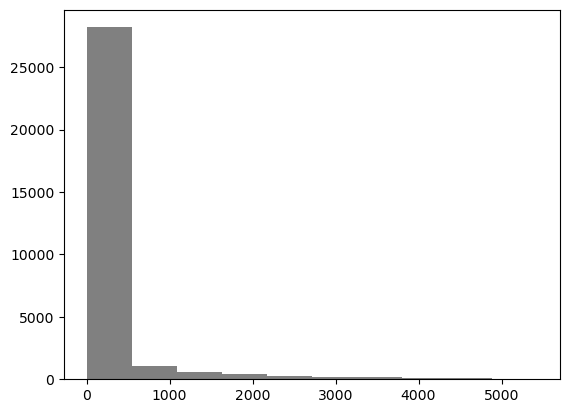

In [23]:
plt.hist(adten['difference'].dropna(),color="grey")
plt.show()

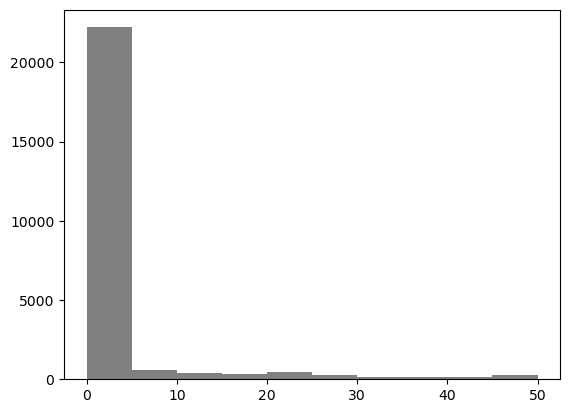

In [24]:
plt.hist(adten['difference'].dropna(),color="grey",range=[0,50])
plt.show()

In [25]:
adten['enrolled'].value_counts()

1    31074
0    18926
Name: enrolled, dtype: int64

In [26]:
adten.loc[adten.difference>48,'enrolled']=0

In [27]:
adten['enrolled'].value_counts()

0    25150
1    24850
Name: enrolled, dtype: int64

In [28]:
adten=adten.drop(columns=['difference','first_open','enrolled_date'])

In [29]:
adten.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [30]:
#feature engineering top screens

In [31]:
top_screens=pd.read_csv('top_screens.csv')

In [32]:
top_screens.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [33]:
top_screens=top_screens.top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [39]:
adten['screen_list'].astype(str)

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                        Splash,Cycle,Loan
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                   Cycle,Splash,Home,RewardsContainer
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [40]:
adten['screen_list'].astype(str)+','

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                  Cycle,Splash,Home,RewardsContainer,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [41]:
adten['screen_list']=adten['screen_list'].astype(str)+','
adten.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan,",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [43]:
for sc in top_screens:
    adten[sc]=adten['screen_list'].str.contains(sc).astype(int)
    adten['screen_list']=adten['screen_list'].str.replace(sc+",","")

In [44]:
adten.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
adten['other']=adten['screen_list'].str.count(',')
adten.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,10


In [54]:
adten=adten.drop(columns=["screen_list"])
adten.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


In [55]:
#creating funnels

In [60]:
saving_screens=["Saving1","Saving2","Saving2Amount",
                "Saving4","Saving5","Saving6","Saving7",
                "Saving8","Saving9","Saving10"]

In [61]:
adten['savings_count']=adten[saving_screens].sum(axis=1)
adten.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count
0,235136,3,2,23,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,10,0


In [62]:
adten.shape

(50000, 69)

In [63]:
adten=adten.drop(columns=saving_screens)
adten.shape

(50000, 59)

In [64]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
adten["CMCount"] = adten[cm_screens].sum(axis=1)
adten = adten.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
adten["CCCount"] = adten[cc_screens].sum(axis=1)
adten = adten.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
adten["LoansCount"] = adten[loan_screens].sum(axis=1)
adten = adten.drop(columns=loan_screens)


In [65]:
adten.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [67]:
adten.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [ ]:
#fitting the model

In [68]:
import time
response=adten['enrolled']
features=adten.drop(columns=['enrolled'])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(features,response,test_size=0.2)

In [72]:
train_identifier=x_train['user']
x_train=x_train.drop(columns=['user'])

In [73]:
test_identifier=x_test['user']
x_test=x_test.drop(columns=['user'])

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
sc_x=StandardScaler()

In [76]:
x_train2=pd.DataFrame(sc_x.fit_transform(x_train))
x_test2=pd.DataFrame(sc_x.transform(x_test))

In [78]:
x_train2.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,1.465217,-1.148102,-0.068209,1.004745,-0.348231,-0.457413,-0.444770,0.967333,-0.643255,0.950380,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,2.103201,-0.260151,0.882693,-0.288601,0.305043
1,-0.502607,0.463943,-1.273078,-0.832257,-0.348231,2.186209,2.248355,0.967333,-0.643255,-1.052211,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,-1.144307,-0.260151,0.060493,-0.288601,-1.166640
2,0.481305,-1.551114,-1.273078,-0.388843,-0.348231,-0.457413,-0.444770,0.967333,1.554593,0.950380,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,0.208822,-0.260151,-0.761707,-0.288601,0.305043
3,-0.994562,1.269966,1.878116,-0.895602,-0.348231,-0.457413,-0.444770,0.967333,1.554593,-1.052211,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,-0.873681,-0.260151,-0.761707,-0.288601,-1.166640
4,-1.486518,-1.282440,-0.346256,-0.452188,-0.348231,-0.457413,-0.444770,-1.033770,-0.643255,-1.052211,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,-0.873681,1.873398,-0.761707,-0.288601,-1.166640


In [79]:
x_test2.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.973261,-1.148102,-0.716985,-0.578877,-0.348231,-0.457413,-0.444770,0.967333,1.554593,-1.052211,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,-0.332430,-0.260151,-0.761707,-0.288601,0.305043
1,1.465217,0.463943,-0.624303,0.434641,-0.348231,-0.457413,-0.444770,0.967333,-0.643255,0.950380,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,1.291324,-0.260151,-0.761707,-0.288601,0.305043
2,-1.486518,0.463943,0.024473,-0.578877,-0.348231,-0.457413,-0.444770,-1.033770,-0.643255,-1.052211,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,-0.603055,-0.260151,0.882693,-0.288601,-1.166640
3,-0.994562,0.329606,0.395201,1.194780,-0.348231,-0.457413,2.248355,0.967333,-0.643255,0.950380,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,0.750073,1.873398,-0.761707,-0.288601,0.305043
4,-0.502607,-0.476417,0.951294,1.068090,-0.348231,-0.457413,-0.444770,0.967333,-0.643255,0.950380,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,0.750073,-0.260151,-0.761707,-0.288601,0.305043


In [80]:
x_train2.columns=x_train.columns.values
x_test2.columns=x_test.columns.values

In [81]:
x_train2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,CMCount,CCCount,LoansCount
0,1.465217,-1.148102,-0.068209,1.004745,-0.348231,-0.457413,-0.444770,0.967333,-0.643255,0.950380,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,2.103201,-0.260151,0.882693,-0.288601,0.305043
1,-0.502607,0.463943,-1.273078,-0.832257,-0.348231,2.186209,2.248355,0.967333,-0.643255,-1.052211,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,-1.144307,-0.260151,0.060493,-0.288601,-1.166640
2,0.481305,-1.551114,-1.273078,-0.388843,-0.348231,-0.457413,-0.444770,0.967333,1.554593,0.950380,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,0.208822,-0.260151,-0.761707,-0.288601,0.305043
3,-0.994562,1.269966,1.878116,-0.895602,-0.348231,-0.457413,-0.444770,0.967333,1.554593,-1.052211,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,-0.873681,-0.260151,-0.761707,-0.288601,-1.166640
4,-1.486518,-1.282440,-0.346256,-0.452188,-0.348231,-0.457413,-0.444770,-1.033770,-0.643255,-1.052211,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,-0.873681,1.873398,-0.761707,-0.288601,-1.166640


In [82]:
x_test2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savings_count,CMCount,CCCount,LoansCount
0,0.973261,-1.148102,-0.716985,-0.578877,-0.348231,-0.457413,-0.444770,0.967333,1.554593,-1.052211,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,-0.332430,-0.260151,-0.761707,-0.288601,0.305043
1,1.465217,0.463943,-0.624303,0.434641,-0.348231,-0.457413,-0.444770,0.967333,-0.643255,0.950380,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,1.291324,-0.260151,-0.761707,-0.288601,0.305043
2,-1.486518,0.463943,0.024473,-0.578877,-0.348231,-0.457413,-0.444770,-1.033770,-0.643255,-1.052211,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,-0.603055,-0.260151,0.882693,-0.288601,-1.166640
3,-0.994562,0.329606,0.395201,1.194780,-0.348231,-0.457413,2.248355,0.967333,-0.643255,0.950380,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,0.750073,1.873398,-0.761707,-0.288601,0.305043
4,-0.502607,-0.476417,0.951294,1.068090,-0.348231,-0.457413,-0.444770,0.967333,-0.643255,0.950380,...,-0.120233,-0.116982,-0.118184,-0.091067,-0.085754,0.750073,-0.260151,-0.761707,-0.288601,0.305043


In [83]:
x_train2.index=x_train.index.values
x_test2.index=x_test.index.values

In [84]:
from sklearn.linear_model import LogisticRegression

In [96]:
lr=LogisticRegression(penalty='l1',solver='liblinear')

In [97]:
lr.fit(x_train2,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [99]:
y_pred=lr.predict(x_test2)

In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [101]:
cm=confusion_matrix(y_test,y_pred)

In [102]:
accuracy_score(y_test,y_pred)

0.7595

In [103]:
precision_score(y_test,y_pred)

0.7588129854610636

In [104]:
recall_score(y_test,y_pred)

0.7613908872901679

In [105]:
f1_score(y_test,y_pred)

0.7600997506234415

In [106]:
cm

array([[3785, 1211],
       [1194, 3810]], dtype=int64)

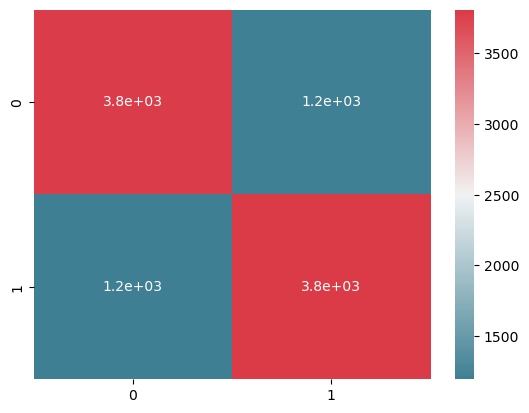

In [108]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(cm,annot=True,cmap=cmap)
plt.show()

In [113]:
from sklearn.model_selection import cross_val_score

In [117]:
cvs=cross_val_score(estimator=lr,X=x_train2,y=y_train,cv=10)

In [119]:
cvs

array([0.7685 , 0.7775 , 0.76725, 0.77075, 0.76925, 0.7705 , 0.765  ,
       0.773  , 0.7745 , 0.764  ])

In [120]:
cvs.mean()

0.770025

In [122]:
final_result=pd.concat([test_identifier,y_test],axis=1)
final_result.head()

,user,enrolled
37453,127424,0
23824,123912,1
4131,153269,1
48978,246271,1
25491,353049,1


In [124]:
final_result['predicted']=y_pred
final_result.head()

,user,enrolled,predicted
37453,127424,0,0
23824,123912,1,1
4131,153269,1,1
48978,246271,1,1
25491,353049,1,1


In [126]:
final_result.reset_index(drop=True)

,user,enrolled,predicted
0,127424,0,0
1,123912,1,1
2,153269,1,1
3,246271,1,1
4,353049,1,1
...,...,...,...
9995,308279,1,1
9996,247019,1,1
9997,238235,1,1
9998,300314,1,1
